# Week 5 material

### Data Load

### LinReg example

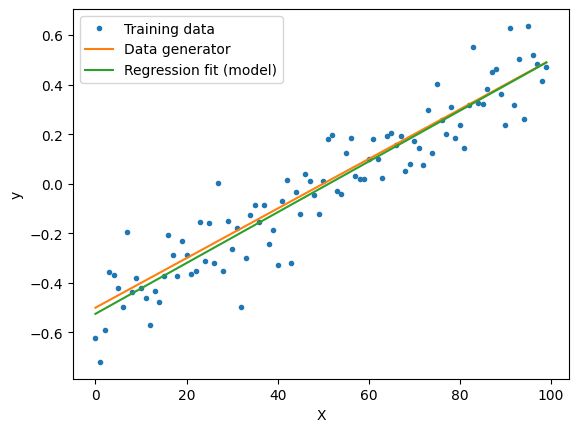

Ran Exercise 5.2.2


In [12]:
# exercise 5.2.2

import numpy as np
import sklearn.linear_model as lm
from matplotlib.pyplot import figure, legend, plot, show, xlabel, ylabel

# Use dataset as in the previous exercise
N = 100
X = np.array(range(N)).reshape(-1, 1)
eps_mean, eps_std = 0, 0.1
eps = np.array(eps_std * np.random.randn(N) + eps_mean).reshape(-1, 1)
w0 = -0.5
w1 = 0.01
y = w0 + w1 * X + eps
y_true = y - eps

# Fit ordinary least squares regression model
model = lm.LinearRegression(fit_intercept=True)
model = model.fit(X, y)
# Compute model output:
y_est = model.predict(X)
# Or equivalently:
# y_est = model.intercept_ + X @ model.coef_


# Plot original data and the model output
f = figure()

plot(X, y, ".")
plot(X, y_true, "-")
plot(X, y_est, "-")
xlabel("X")
ylabel("y")
legend(["Training data", "Data generator", "Regression fit (model)"])

show()

print("Ran Exercise 5.2.2")


### Task 5.2.3

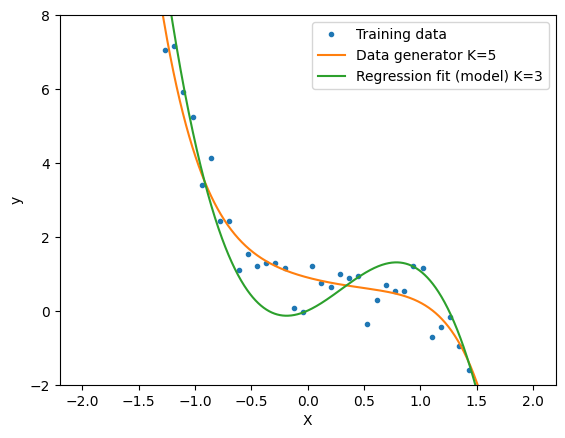

Ran Exercise 5.2.3


In [20]:
# exercise 5.2.3

import numpy as np
import sklearn.linear_model as lm
from matplotlib.pyplot import figure, legend, plot, show, xlabel, ylabel, ylim

# Parameters
Kd = 5  # no of terms for data generator
Km = 3  # no of terms for regression model
N = 50  # no of data objects to train a model
Xe = np.linspace(-2, 2, 1000).reshape(
    -1, 1
)  # X values to visualize true data and model
eps_mean, eps_std = 0, 0.5  # noise parameters

# Generate dataset (with noise)
X = np.linspace(-2, 2, N).reshape(-1, 1)
Xd = np.power(X, range(1, Kd + 1))
eps = eps_std * np.random.randn(N) + eps_mean
w = -np.power(-0.9, range(1, Kd + 2))
y = w[0] + Xd @ w[1:] + eps


# True data generator (assuming no noise)
Xde = np.power(Xe, range(1, Kd + 1))
y_true = w[0] + Xde @ w[1:]


# Fit ordinary least squares regression model
Xm = np.power(X, range(1, Km + 1))
model = lm.LinearRegression()
model = model.fit(Xm, y)

# Predict values
Xme = np.power(Xe, range(1, Km + 1))
y_est = model.predict(Xme)

# Plot original data and the model output
f = figure()
plot(X, y, ".")
plot(Xe, y_true, "-")
plot(Xe, y_est, "-")
xlabel("X")
ylabel("y")
ylim(-2, 8)
legend(
    [
        "Training data",
        "Data generator K={0}".format(Kd),
        "Regression fit (model) K={0}".format(Km),
    ]
)

show()

print("Ran Exercise 5.2.3")


### Task 5.2.4

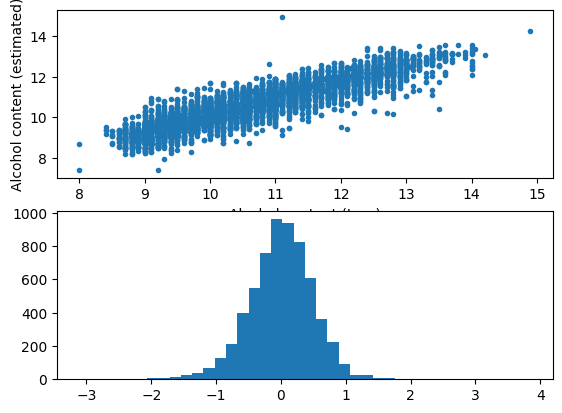

Ran Exercise 5.2.4


In [9]:
# exercise 5.2.4
import sklearn.linear_model as lm

# requires wine data from exercise 5.1.5
from ex5_1_5 import *
from matplotlib.pylab import figure, hist, plot, show, subplot, xlabel, ylabel

# Split dataset into features and target vector
alcohol_idx = attributeNames.index("Alcohol")
y = X[:, alcohol_idx]

X_cols = list(range(0, alcohol_idx)) + list(range(alcohol_idx + 1, len(attributeNames)))
X = X[:, X_cols]

# Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(X, y)

# Predict alcohol content
y_est = model.predict(X)
residual = y_est - y

# Display scatter plot
figure()
subplot(2, 1, 1)
plot(y, y_est, ".")
xlabel("Alcohol content (true)")
ylabel("Alcohol content (estimated)")
subplot(2, 1, 2)
hist(residual, 40)

show()

print("Ran Exercise 5.2.4")


### 5.2.5

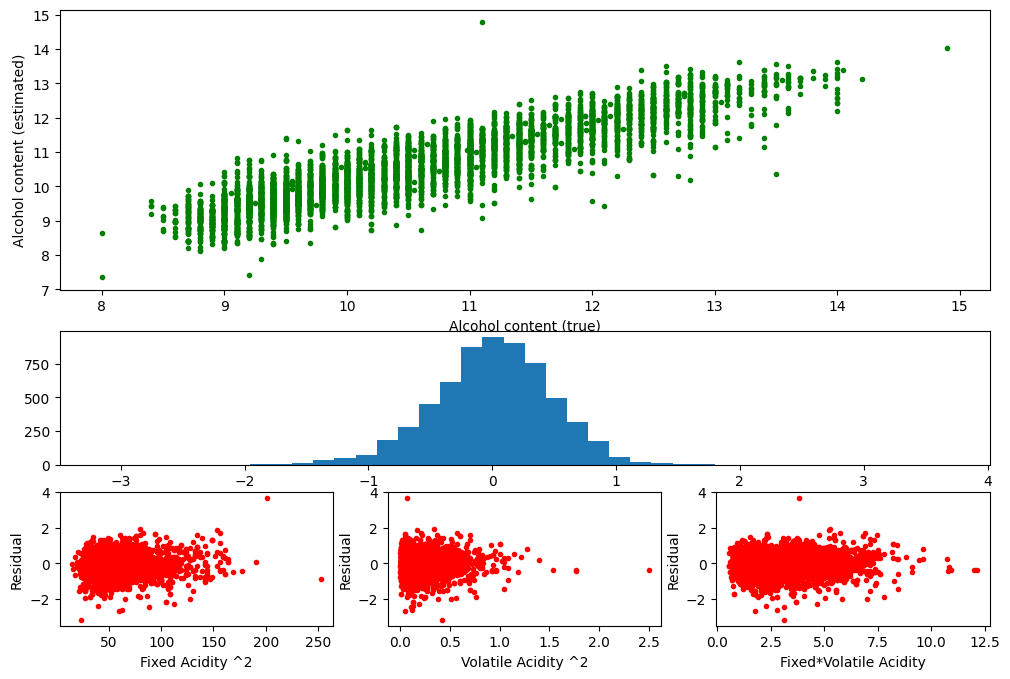

Ran Exercise 5.2.5


In [10]:
# exercise 5.2.5
import sklearn.linear_model as lm

# requires data from exercise 5.1.4
from ex5_1_5 import *
from matplotlib.pylab import figure, hist, plot, show, subplot, xlabel, ylabel

# Split dataset into features and target vector
alcohol_idx = attributeNames.index("Alcohol")
y = X[:, alcohol_idx]

X_cols = list(range(0, alcohol_idx)) + list(range(alcohol_idx + 1, len(attributeNames)))
X = X[:, X_cols]

# Additional nonlinear attributes
fa_idx = attributeNames.index("Fixed acidity")
va_idx = attributeNames.index("Volatile acidity")
Xfa2 = np.power(X[:, fa_idx], 2).reshape(-1, 1)
Xva2 = np.power(X[:, va_idx], 2).reshape(-1, 1)
Xfava = (X[:, fa_idx] * X[:, va_idx]).reshape(-1, 1)
X = np.asarray(np.bmat("X, Xfa2, Xva2, Xfava"))

# Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(X, y)

# Predict alcohol content
y_est = model.predict(X)
residual = y_est - y

# Display plots
figure(figsize=(12, 8))

subplot(2, 1, 1)
plot(y, y_est, ".g")
xlabel("Alcohol content (true)")
ylabel("Alcohol content (estimated)")

subplot(4, 1, 3)
hist(residual, 40)

subplot(4, 3, 10)
plot(Xfa2, residual, ".r")
xlabel("Fixed Acidity ^2")
ylabel("Residual")

subplot(4, 3, 11)
plot(Xva2, residual, ".r")
xlabel("Volatile Acidity ^2")
ylabel("Residual")

subplot(4, 3, 12)
plot(Xfava, residual, ".r")
xlabel("Fixed*Volatile Acidity")
ylabel("Residual")

show()

print("Ran Exercise 5.2.5")


### Task 5.2.6 Logistic reg


Probability of given sample being a white wine: 0.9983

Overall misclassification rate: 0.019


c:\ProgramData\anaconda3\envs\mldm\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


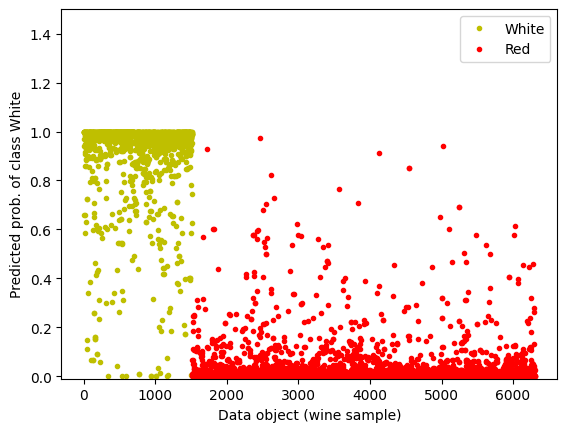

Ran Exercise 5.2.6


In [11]:
# exercise 5.2.6
import sklearn.linear_model as lm

# requires data from exercise 5.1.4
from ex5_1_5 import *
from matplotlib.pylab import figure, legend, plot, show, xlabel, ylabel, ylim

# Fit logistic regression model

model = lm.LogisticRegression()
model = model.fit(X, y)

# Classify wine as White/Red (0/1) and assess probabilities
y_est = model.predict(X)
y_est_white_prob = model.predict_proba(X)[:, 0]

# Define a new data object (new type of wine), as in exercise 5.1.7
x = np.array([6.9, 1.09, 0.06, 2.1, 0.0061, 12, 31, 0.99, 3.5, 0.44, 12]).reshape(1, -1)
# Evaluate the probability of x being a white wine (class=0)
x_class = model.predict_proba(x)[0, 0]

# Evaluate classifier's misclassification rate over entire training data
misclass_rate = np.sum(y_est != y) / float(len(y_est))

# Display classification results
print("\nProbability of given sample being a white wine: {0:.4f}".format(x_class))
print("\nOverall misclassification rate: {0:.3f}".format(misclass_rate))

f = figure()
class0_ids = np.nonzero(y == 0)[0].tolist()
plot(class0_ids, y_est_white_prob[class0_ids], ".y")
class1_ids = np.nonzero(y == 1)[0].tolist()
plot(class1_ids, y_est_white_prob[class1_ids], ".r")
xlabel("Data object (wine sample)")
ylabel("Predicted prob. of class White")
legend(["White", "Red"])
ylim(-0.01, 1.5)

show()

print("Ran Exercise 5.2.6")
